In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('HR_comma_sep.csv')

In [2]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
dum1=pd.get_dummies(df['sales'])
dum2=pd.get_dummies(df['salary'])

In [4]:
dum1.drop('IT',axis="columns",inplace=True)
dum2.drop('medium',axis="columns",inplace=True)

In [5]:
df_new=pd.concat([df,dum1,dum2],axis="columns")

In [6]:
df_new.drop(['sales','salary'],axis="columns",inplace=True)

In [7]:
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,support,technical,high,low
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,False,False,False,True
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,False,False,False,False
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,False,False,False,False
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,False,False,False,True
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,True,False,False,True
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,True,False,False,True
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,True,False,False,True
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,True,False,False,True


In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df_new.drop('high',axis='columns'),df_new['high'],test_size=0.15)

In [10]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\ranje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
clf.score(x_test,y_test)

0.9195555555555556

In [12]:
y_predicted=clf.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

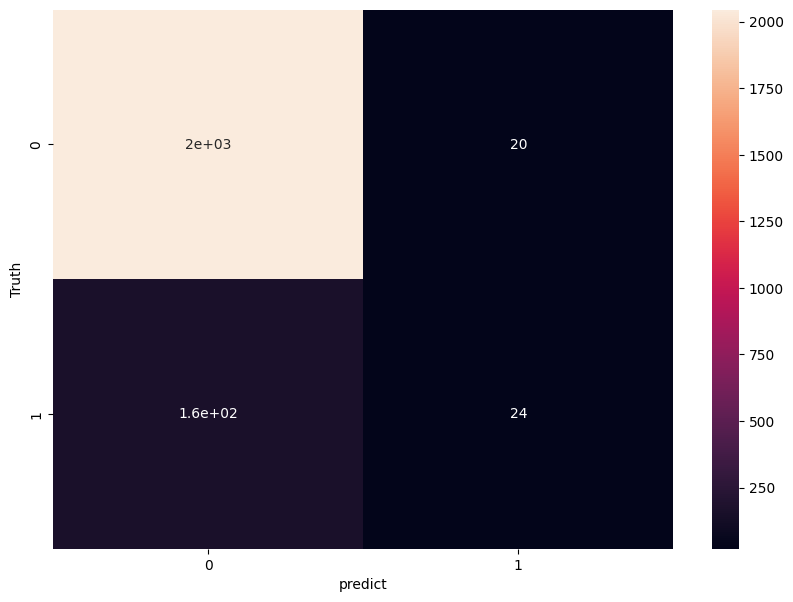

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('Truth')
